The notebook is based on the [Metacritic Games](https://www.kaggle.com/datasets/henrylin03/metacritic-games-user-reviews-and-metascores) dataset, which contains Metascores and user reviews of video games from Metacritic.com. The dataset includes all games with User Scores and/or Metascores on all platforms except iOS, and it was scraped using a [Python script](https://github.com/henrylin03/video-games/blob/main/scraper.py) and cleaned using [pandas and SQL](https://github.com/henrylin03/video-games/blob/main/analysis.ipynb). 

The notebook explores the dataset using various data analysis techniques, including visualization and statistical analysis, to gain insights into the video game industry.

In [1]:
# Importing Pandas library.
import pandas as pd

In [2]:
# Read CSV file and create a Pandas DataFrame object from it.
df = pd.read_csv("../input/metacritic-games-user-reviews-and-metascores/metacritic_games.csv")

In [3]:
df.isnull().sum() # To get the count of null values in each column.
df = df.dropna() # To drop rows with any missing values.

In [4]:
df.duplicated().sum() # To get the count of duplicated rows.
df = df.drop_duplicates() # To drop duplicated rows.

In [5]:
# Get the column names of the DataFrame.
df.columns

Index(['name', 'platform', 'release_date', 'summary', 'meta_score',
       'user_score'],
      dtype='object')

In [6]:
# Display the first few rows of the DataFrame.
df.head()

,name,platform,release_date,summary,meta_score,user_score
0,#DRIVE,Switch,2021-02-16 00:00:00.000000,#DRIVE is an endless driving videogame inspire...,69.0,6.8
1,#IDARB,Xbox One,2015-01-30 00:00:00.000000,#IDARB started as a picture of red box. Then m...,77.0,6.9
3,'Splosion Man,Xbox 360,2009-07-22 00:00:00.000000,"[Xbox Live Arcade] Fools they were, to tread w...",84.0,7.8
4,.detuned,PlayStation 3,2009-10-15 00:00:00.000000,[Playstation Network] Developed by .theprodukk...,46.0,3.7
5,.hack//G.U. Last Recode,PC,2017-11-03 00:00:00.000000,.hack//G.U. is back! Log back into the .hack//...,69.0,7.9


In [7]:
# Display the last few rows of the DataFrame.
df.tail()

,name,platform,release_date,summary,meta_score,user_score
19986,oOo: Ascension,Xbox One,2018-05-25 00:00:00.000000,oOo: Ascension is a lightning-paced test of re...,70.0,7.3
19987,rain,PlayStation 3,2013-10-01 00:00:00.000000,"Developed by PlayStation C.A.M.P!, the creativ...",72.0,7.8
19988,theHunter: Call of the Wild,PC,2017-02-16 00:00:00.000000,Experience the thrill of the hunt in a vast op...,64.0,6.7
19990,void tRrLM(); //Void Terrarium,Switch,2020-07-14 00:00:00.000000,"In a world contaminated with toxic fungi, a di...",74.0,7.0
19991,xXx,Game Boy Advance,2002-07-31 00:00:00.000000,You are underground thrill-seeker turned spy X...,50.0,5.0


In [8]:
# Get the dimensions of the DataFrame (number of rows, number of columns).
df.shape

(18507, 6)

In [9]:
# Get the data types of each column in the DataFrame.
df.dtypes

name             object
platform         object
release_date     object
summary          object
meta_score      float64
user_score      float64
dtype: object

In [10]:
# Get a summary of the DataFrame, including column data types and non-null counts.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18507 entries, 0 to 19991
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          18507 non-null  object 
 1   platform      18507 non-null  object 
 2   release_date  18507 non-null  object 
 3   summary       18507 non-null  object 
 4   meta_score    18507 non-null  float64
 5   user_score    18507 non-null  float64
dtypes: float64(2), object(4)
memory usage: 1012.1+ KB


In [11]:
# Group the DataFrame by the 'platform' column, calculate the sum of the 'meta_score' 
# column for each group, and round the result.
df.groupby('platform')['meta_score'].sum().round()

platform
3DS                  26832.0
DS                   39714.0
Dreamcast             9002.0
Game Boy Advance     24665.0
GameCube             29974.0
Nintendo 64           5575.0
PC                  363510.0
PSP                  33601.0
PlayStation          12283.0
PlayStation 2        91517.0
PlayStation 3        87261.0
PlayStation 4       143363.0
PlayStation 5        22011.0
PlayStation Vita     17858.0
Stadia                 350.0
Switch              104330.0
Wii                  40132.0
Wii U                13348.0
Xbox                 48020.0
Xbox 360            109807.0
Xbox One             81084.0
Xbox Series X        14442.0
Name: meta_score, dtype: float64

In [12]:
# Select the 'name' and 'meta_score' columns of the DataFrame, sort the result 
# by 'meta_score' in ascending order, and display the first 10 rows.
df[['name', 'meta_score']].sort_values('meta_score').head(10)

,name,meta_score
5630,Family Party: 30 Great Games Obstacle Arcade,11.0
13301,Ride to Hell: Retribution,16.0
19711,Yaris,17.0
4405,Double Dragon II: Wander of the Dragons,17.0
18850,Vroom in the Night Sky,17.0
8704,Leisure Suit Larry: Box Office Bust,17.0
13717,SPOGS Racing,18.0
13302,Ride to Hell: Retribution,19.0
564,Alone in the Dark: Illumination,19.0
3752,Deal or No Deal,20.0


In [13]:
# Sort the result by 'meta_score' in descending order, and display the first 50 rows.
df[['name', 'meta_score']].sort_values('meta_score', ascending=False).head(50)

,name,meta_score
16970,The Legend of Zelda: Ocarina of Time,99.0
6751,Grand Theft Auto IV,98.0
6752,Grand Theft Auto IV,98.0
17993,Tony Hawk's Pro Skater 2,98.0
14910,SoulCalibur,98.0
6757,Grand Theft Auto V,97.0
6749,Grand Theft Auto III,97.0
13017,Red Dead Redemption 2,97.0
13018,Red Dead Redemption 2,97.0
12010,Perfect Dark,97.0


In [14]:
# Count the number of occurrences of each unique value in the 'platform' 
# column of the DataFrame.
df['platform'].value_counts()

PC                  5034
PlayStation 4       2011
Xbox 360            1593
Switch              1417
PlayStation 2       1317
PlayStation 3       1232
Xbox One            1111
Xbox                 673
Wii                  606
DS                   585
PSP                  488
GameCube             421
3DS                  383
Game Boy Advance     353
PlayStation 5        295
PlayStation Vita     251
Xbox Series X        191
Wii U                185
PlayStation          164
Dreamcast            121
Nintendo 64           71
Stadia                 5
Name: platform, dtype: int64

In [15]:
# Compute summary statistics for the meta_score and user_score columns.
df[['meta_score', 'user_score']].describe()

,meta_score,user_score
count,18507.000000,18507.000000
mean,71.252985,6.961361
std,12.175243,1.355246
min,11.000000,0.300000
25%,65.000000,6.300000
50%,73.000000,7.300000
75%,80.000000,7.900000
max,99.000000,9.700000


<AxesSubplot:>

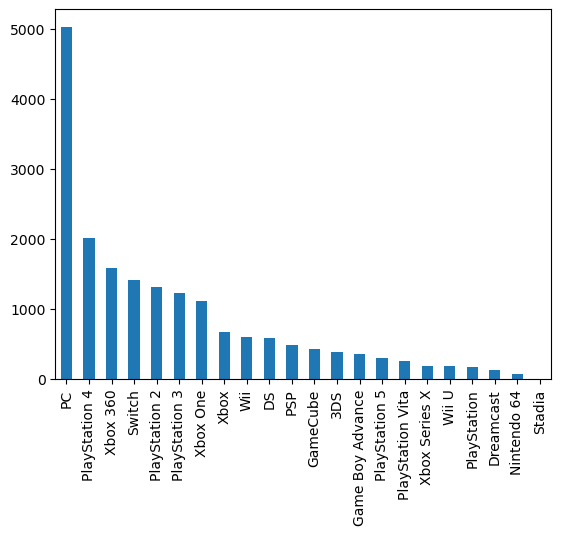

In [16]:
# Compute the distribution of games across different platforms, and create a bar chart.
platform_counts = df['platform'].value_counts()
platform_counts.plot(kind='bar')

Text(0.5, 0, 'Release Year')

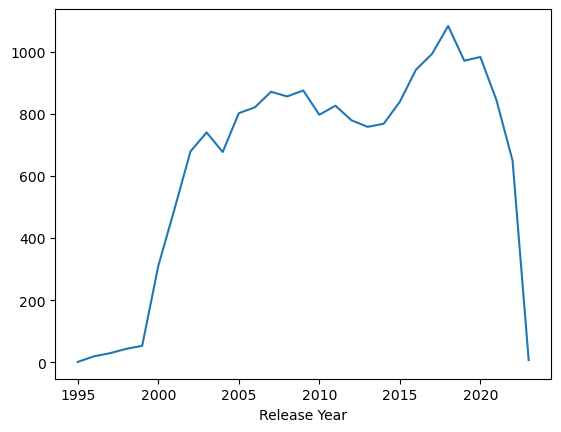

In [17]:
# Convert the release_date column to a datetime data type, and then create a time-series 
# plot to analyze the release dates of games over time.
df['release_date'] = pd.to_datetime(df['release_date'])
ax = df.groupby(df['release_date'].dt.year)['name'].count().plot(kind='line')
ax.set_xlabel('Release Year')

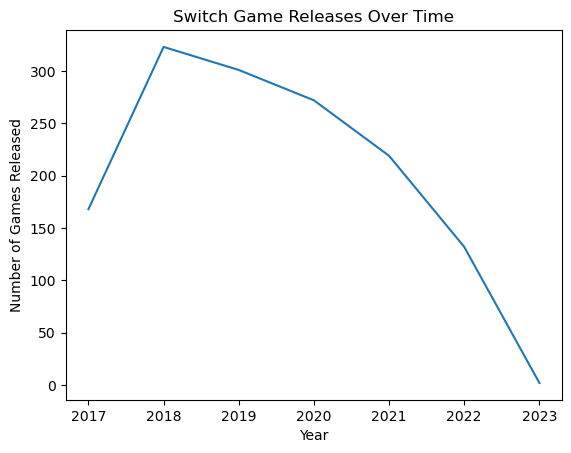

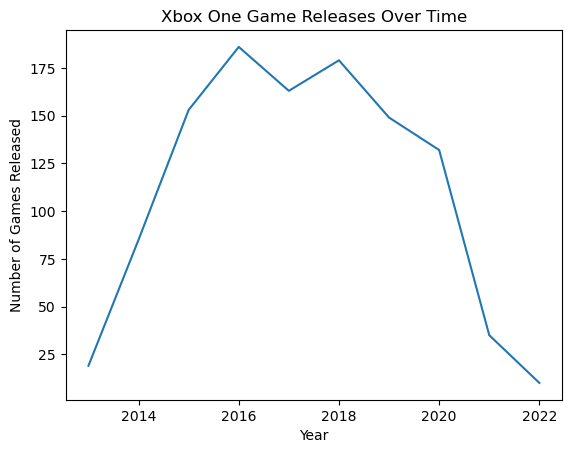

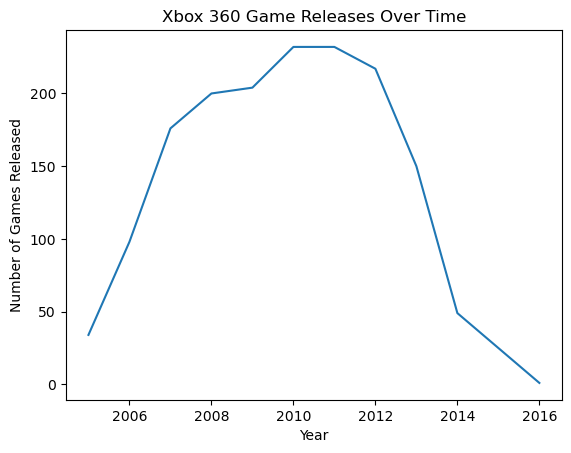

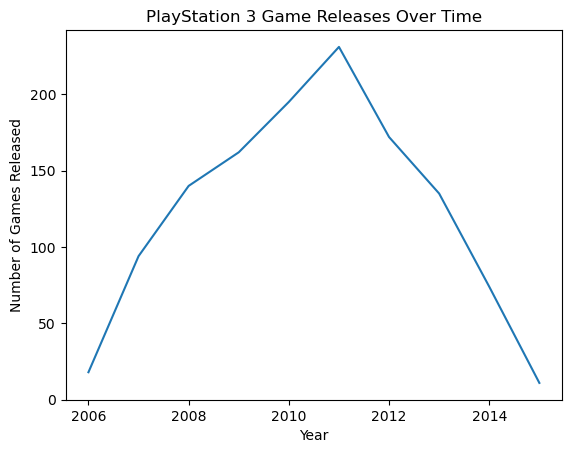

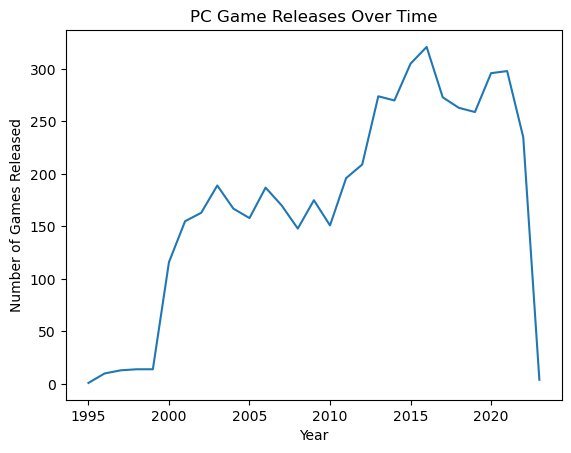

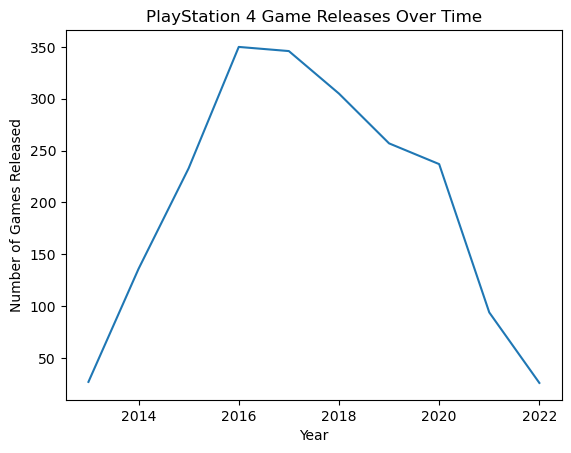

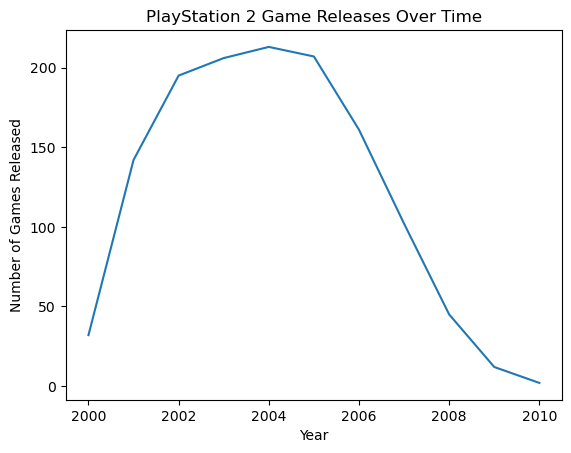

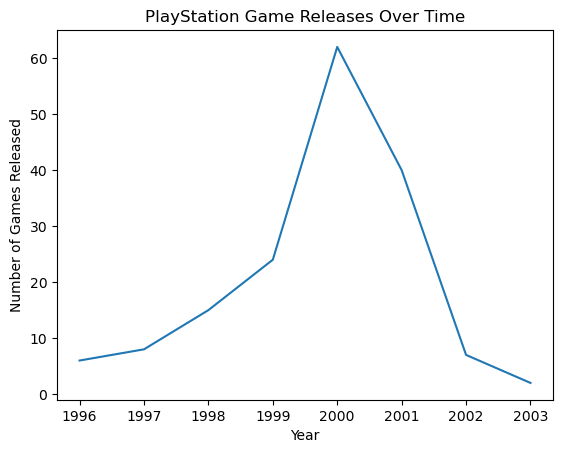

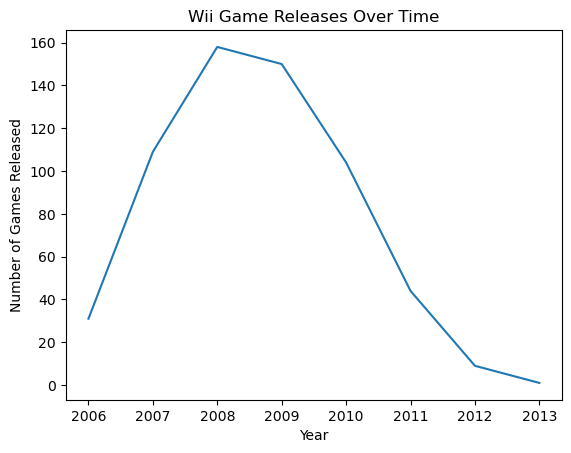

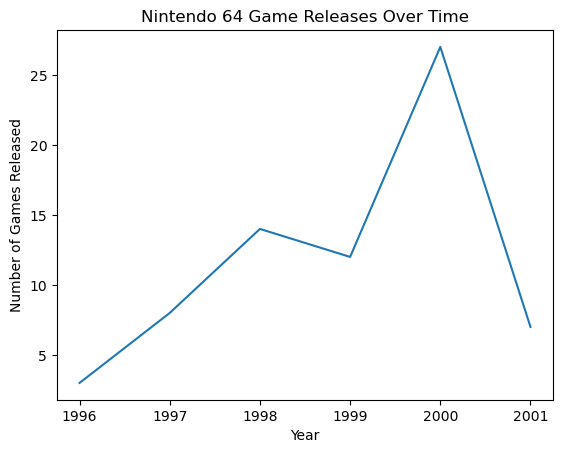

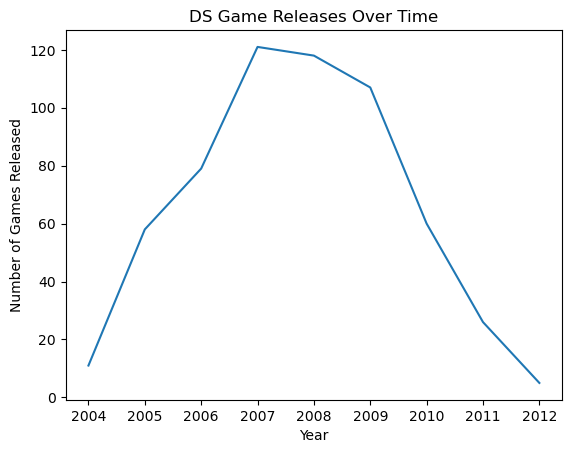

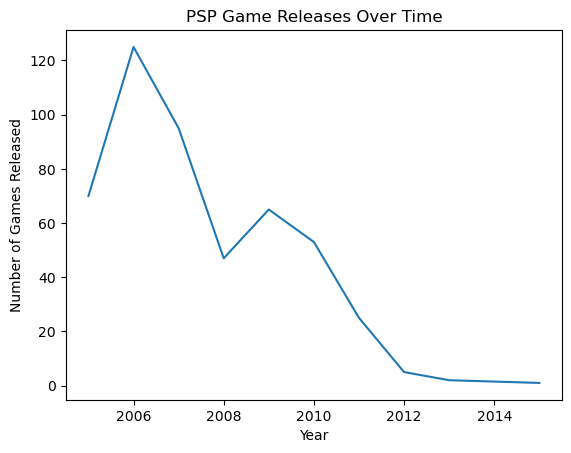

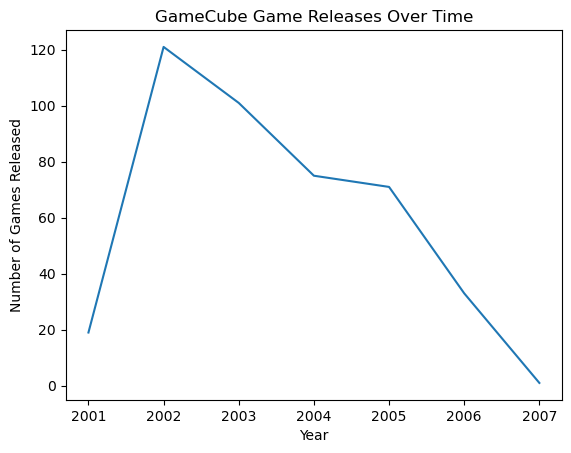

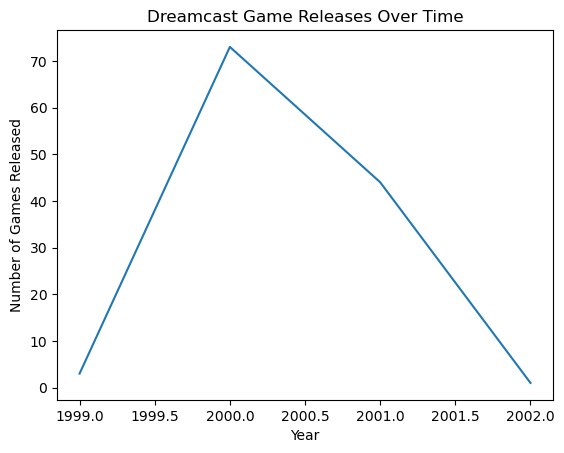

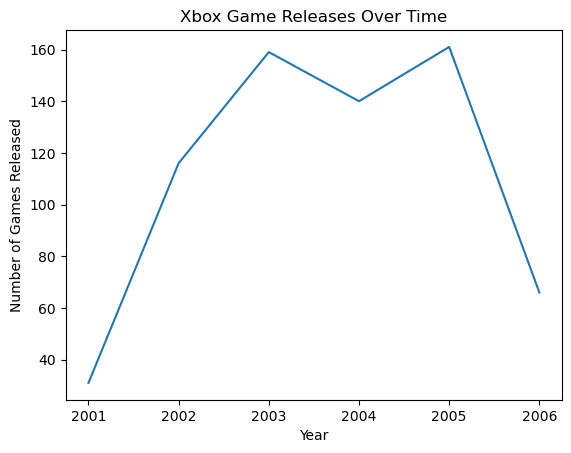

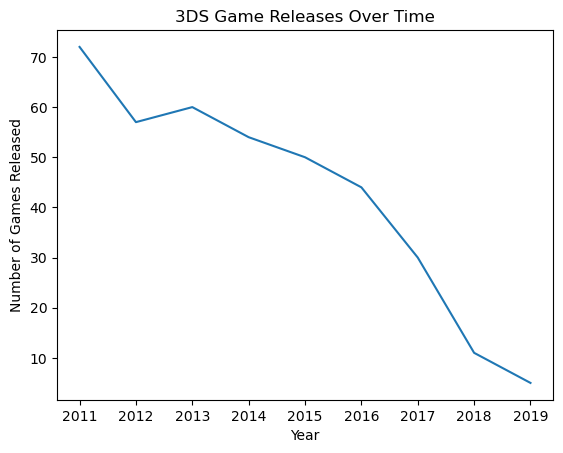

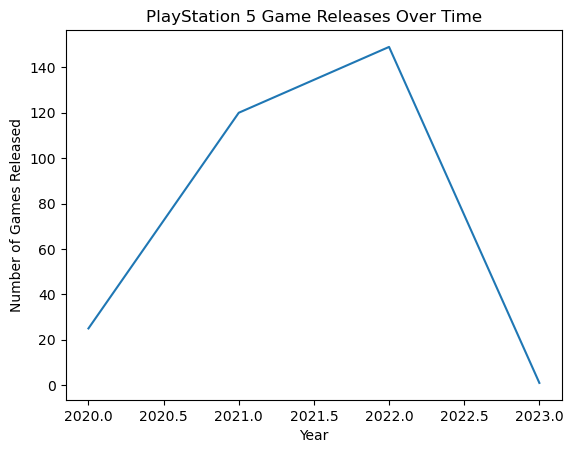

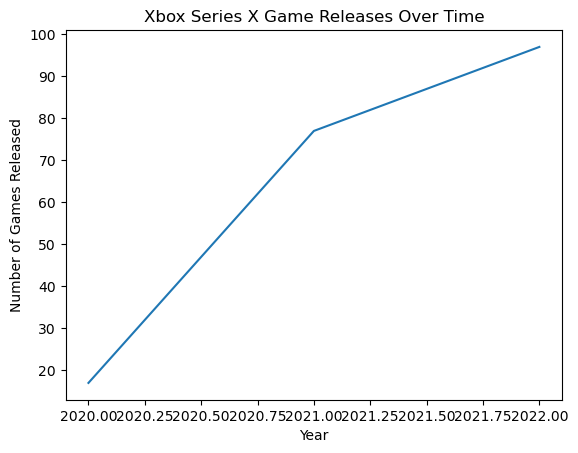

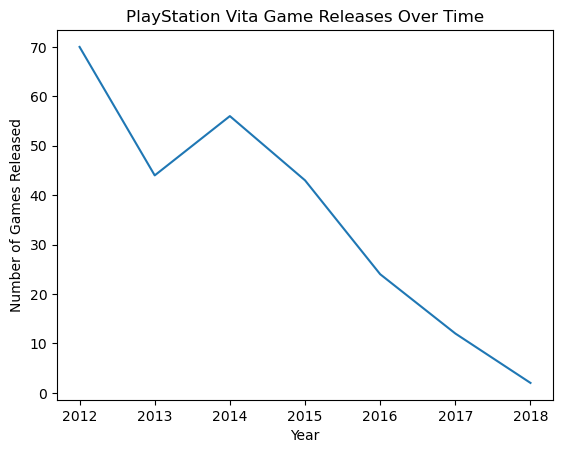

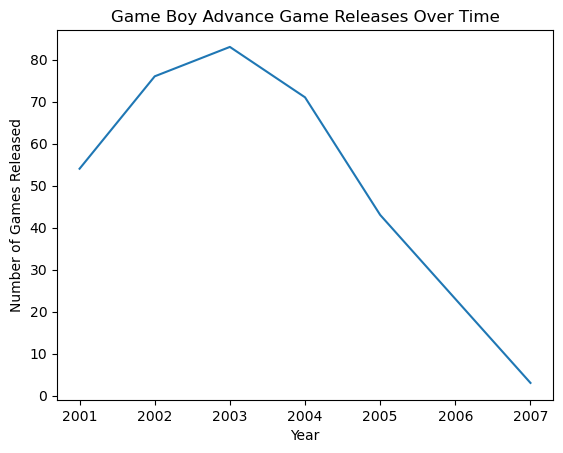

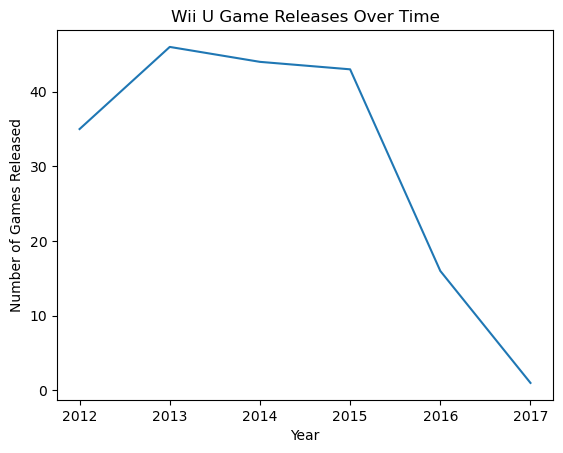

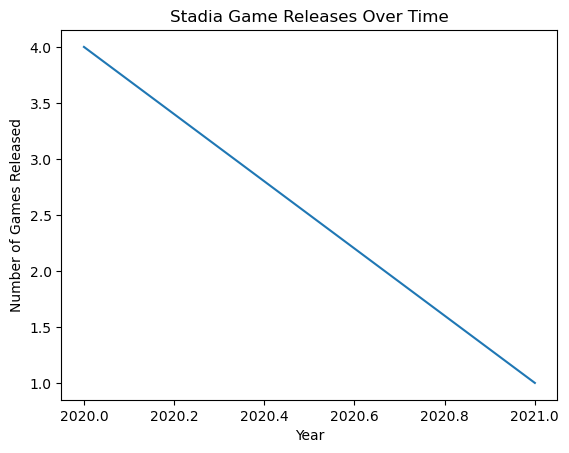

In [18]:
import matplotlib.pyplot as plt

# Convert the release_date column to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

# Group the data by platform and year
grouped = df.groupby(['platform', df['release_date'].dt.year])['name'].count()

# Create a plot for each platform
platforms = df['platform'].unique()
for platform in platforms:
    plt.figure()
    plt.title(f"{platform} Game Releases Over Time")
    plt.xlabel("Year")
    plt.ylabel("Number of Games Released")
    plt.plot(grouped[platform].index, grouped[platform].values)
    plt.show()

In [19]:
# Compute the correlation coefficients between the different variables in the dataset.
df[['meta_score', 'user_score']].corr()

,meta_score,user_score
meta_score,1.000000,0.519909
user_score,0.519909,1.000000


Text(0, 0.5, 'User Score')

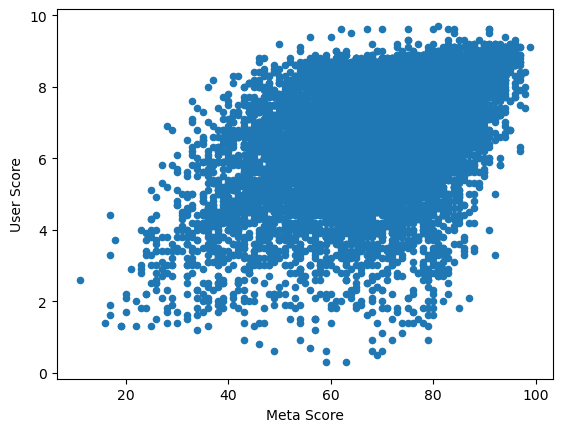

In [20]:
# Create scatterplots to visualize the relationships between different variables.
ax = df.plot.scatter(x='meta_score', y='user_score')
ax.set_xlabel('Meta Score')
ax.set_ylabel('User Score')

The output of the code below is a scatter plot of meta_score and user_score, with the Pearson correlation coefficient and p-value displayed on the plot.

Pearson Correlation is a measure of the linear association between two variables $X$ and $Y$. It is calculated as the covariance between $X$ and $Y$ divided by the product of their standard deviations:

\begin{equation}
r_{X,Y} = \frac{\text{cov}(X,Y)}{\text{std}(X)\text{std}(Y)}
\end{equation}

where $\text{cov}(X,Y)$ is the covariance between $X$ and $Y$, and $\text{std}(X)$ and $\text{std}(Y)$ are the standard deviations of $X$ and $Y$, respectively.

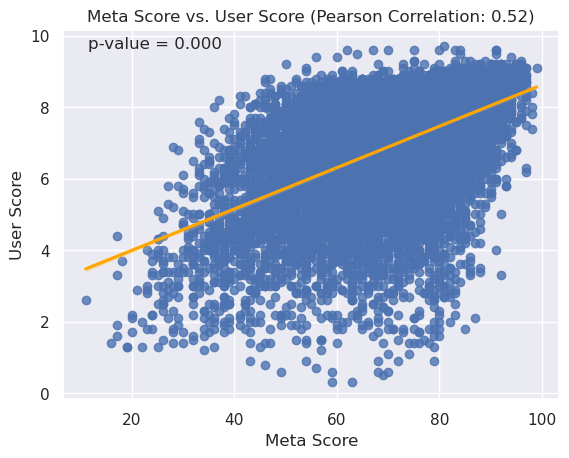

In [21]:
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr

# Drop any rows containing NaN or infinite values.
df = df.replace([np.inf, -np.inf], np.nan).dropna()

# Calculate the Pearson correlation between meta_score and user_score.
corr, p_value = pearsonr(df["meta_score"], df["user_score"])
corr = round(corr, 3)

# Plot the scatter plot with a line showing the correlation.
sns.set(style="darkgrid")
sns.regplot(x="meta_score", y="user_score", data=df, line_kws={"color": "orange"})
plt.xlabel("Meta Score")
plt.ylabel("User Score")
plt.title("Meta Score vs. User Score (Pearson Correlation: {})".format(corr))
plt.annotate("p-value = {:.3f}".format(p_value), xy=(0.05, 0.95), xycoords="axes fraction")
plt.show()

The p-value of 0.000 means that the probability of obtaining a correlation coefficient as extreme as, or more extreme than, the observed value (in this case, the Pearson correlation coefficient between meta_score and user_score) under the null hypothesis is extremely small, less than 0.001.

In other words, the p-value is close to zero, which indicates that the observed correlation coefficient is statistically significant, and it is unlikely to occur by chance. Therefore, we can reject the null hypothesis of no correlation between meta_score and user_score and conclude that there is a significant correlation between these two variables in the population.

In [23]:
from scipy.stats import norm, probplot

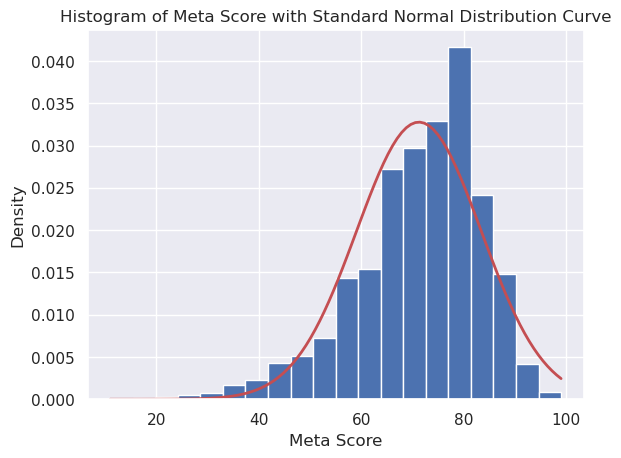

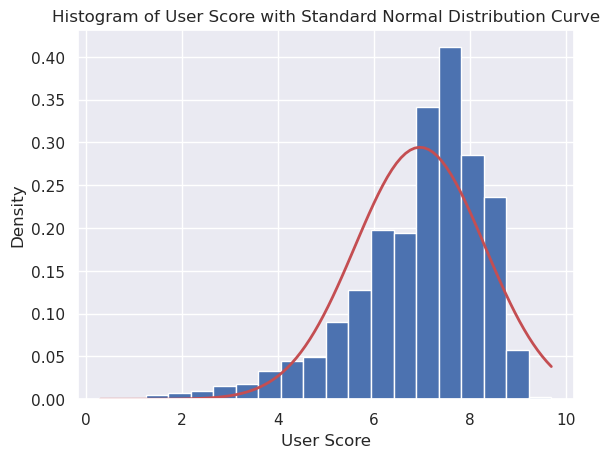

In [24]:
# Plot a histogram of the meta_score column with a standard normal distribution curve.
plt.hist(df['meta_score'], bins=20, density=True)
plt.xlabel('Meta Score')
plt.ylabel('Density')
plt.title('Histogram of Meta Score with Standard Normal Distribution Curve')
x = np.linspace(df['meta_score'].min(), df['meta_score'].max(), 100)
plt.plot(x, norm.pdf(x, df['meta_score'].mean(), df['meta_score'].std()), 'r-', lw=2)
plt.show()

# Plot a histogram of the user_score column with a standard normal distribution curve.
plt.hist(df['user_score'], bins=20, density=True)
plt.xlabel('User Score')
plt.ylabel('Density')
plt.title('Histogram of User Score with Standard Normal Distribution Curve')
x = np.linspace(df['user_score'].min(), df['user_score'].max(), 100)
plt.plot(x, norm.pdf(x, df['user_score'].mean(), df['user_score'].std()), 'r-', lw=2)
plt.show()

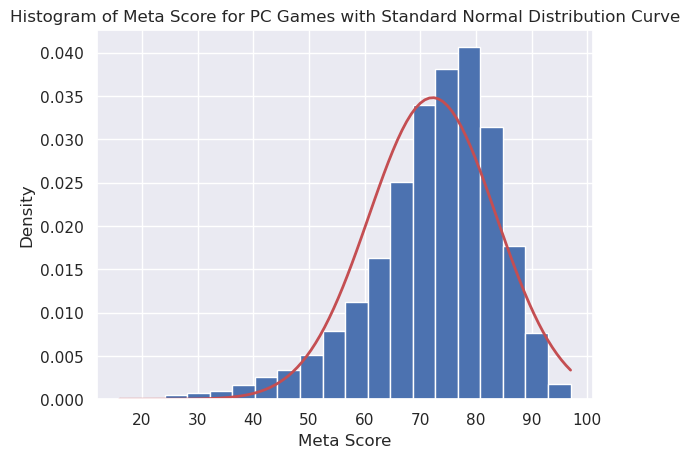

In [27]:
# Create a subset of the data for games released on the PC platform.
pc_df = df[df['platform'] == 'PC']

# Plot a histogram of the meta_score for PC with a standard normal distribution curve.
plt.hist(pc_df['meta_score'], bins=20, density=True)
plt.xlabel('Meta Score')
plt.ylabel('Density')
plt.title('Histogram of Meta Score for PC Games with Standard Normal Distribution Curve')
x = np.linspace(pc_df['meta_score'].min(), pc_df['meta_score'].max(), 100)
plt.plot(x, norm.pdf(x, pc_df['meta_score'].mean(), pc_df['meta_score'].std()), 'r-', lw=2)
plt.show()


A normal probability plot is a graphical technique used to determine whether a set of data is approximately normally distributed. In this case, the plot will display how closely the distribution of meta_score for PC games follows a normal (Gaussian) distribution.

The probplot() function from the scipy.stats module is used to create the plot, and it requires a series or array of data as input. The resulting plot will compare the distribution of the meta_score data to a normal distribution by plotting the quantiles of the data against the corresponding quantiles of a normal distribution.

The red line is the theoretical line of best fit that represents a perfect normal distribution. This line is also known as the "line of equality" or the "45-degree line".

If the data being plotted follows a normal distribution, the points on the plot should fall close to the red line, indicating that the data is normally distributed. If the points deviate significantly from the red line, it suggests that the data may not be normally distributed.

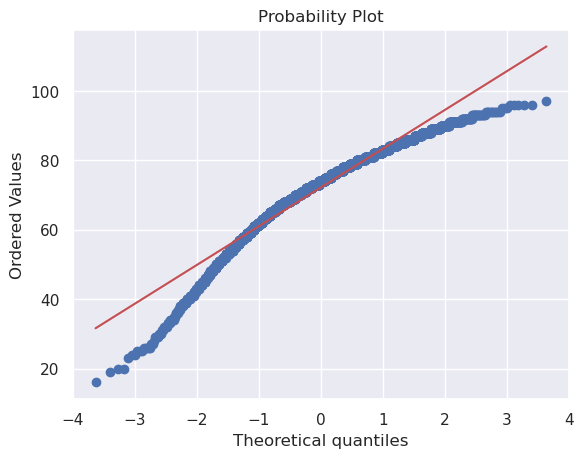

In [28]:
# Check the distribution of the meta_score column for PC using a normal probability plot.
norm_prob_plot = plt.figure()
norm_prob_plot.add_subplot().set_title('Normal Probability Plot of Meta Score for PC Games')
norm_prob_plot = probplot(pc_df['meta_score'], plot=plt)